In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('data.csv')
print(df.head())
print("Total dataframes present : ",len(df))

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

##### Cleaning on column title and its content

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for i in string_columns:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


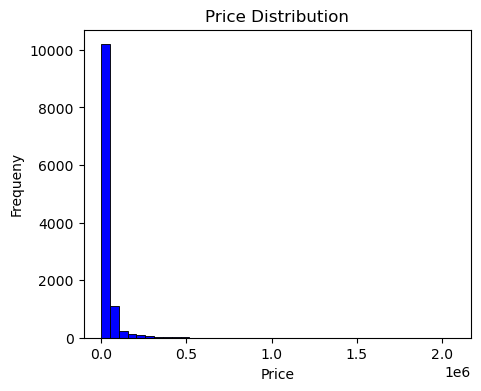

In [8]:
plt.figure(figsize=(5,4))

sns.histplot(df.msrp,bins=40,color='blue',alpha=1)

plt.ylabel("Frequeny")
plt.xlabel("Price")
plt.title("Price Distribution")

plt.show()

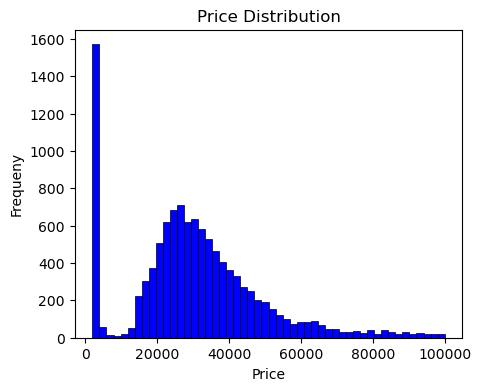

In [9]:
plt.figure(figsize=(5,4))

sns.histplot(df.msrp[df.msrp < 100000],bins=50,color='blue',alpha=1)

plt.ylabel("Frequeny")
plt.xlabel("Price")
plt.title("Price Distribution")

plt.show()

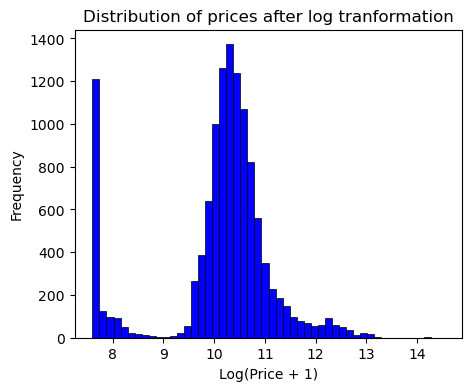

In [10]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(5,4))

sns.histplot(log_price,bins=50,color='blue',alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')


plt.show()

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [12]:
n = len(df)

n_val = int(n*0.2) 
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [13]:

n_val , n_test , n_train

(2382, 2382, 7150)

In [14]:
n , n_val + n_test + n_train

(11914, 11914)

In [15]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [16]:
len(df_train) ,len(df_val) , len(df_test)
len(y_train)

7150

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(2)
np.random.shuffle(idx)

Linear regression

In [19]:
df_train.iloc[10]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category          luxury,high-performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   28
city_mpg                                      20
popularity                                  3916
Name: 10, dtype: object

In [20]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [21]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0

    for i in range(n):
        pred += w[i] * xi[i]
    
    return pred

In [22]:
# xi = [452,11,86]
linear_regression(xi)

12.312

In [23]:
np.expm1(12.312)

222347.2221101062

In [24]:
np.log1p(222347.2221101062)

12.312

In [25]:
def dot_linear(xi,w):
    n = len(xi)
    res = 0.0
    for i in range(n):
        res += xi[i]*w[i]
    return res

In [26]:
def linear_regression(xi):
    return w0 + dot_linear(xi,w)

In [27]:
w_1 = [w0] + w
print(w_1)

[7.17, 0.01, 0.04, 0.002]


In [28]:
def linear_regression(xi):
    xi = [1] + xi
    return dot_linear(xi,w_1)

In [29]:
linear_regression(xi)

12.312

In [30]:
w0 = 7.14
w = [0.01,0.04,0.02]
w_new = [w0] + w

In [31]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1,x2,x10]
X = np.array(X)
print(X)

[[   1  148   24 1385]
 [   1  132   25 2031]
 [   1  453   11   86]]


In [32]:
def linear_regression(X):
    return X.dot(w_new)

In [33]:
linear_regression(X)

array([37.28, 50.08, 13.83])

In [34]:


X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]


X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [35]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
np.column_stack([ones,X])

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [37]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [38]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)
print(w_full)

[ 26.08419498 286.12285934   3.93813107]


Training Regression model


In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # Add a column of ones for the intercept term
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]  # Return both w0 (intercept) and w (coefficients for features)


In [40]:
train_linear_regression(X,y)

(25844.754055766807, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [41]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0 , w = train_linear_regression(X_train,y_train)
y_pred = X_train.dot(w) + w0

<Axes: ylabel='Count'>

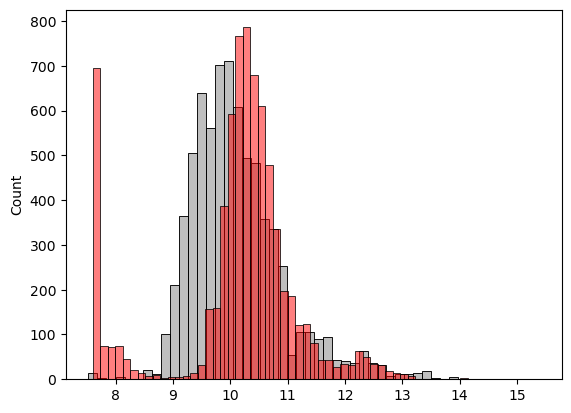

In [43]:
sns.histplot(y_pred,color='grey',alpha=0.5,bins=50)
sns.histplot(y_train,color='red',alpha=0.5,bins=50)

In [44]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [45]:
rmse(y_train,y_pred)

0.7764354792432973

Validating the model 

In [46]:
def prepare_x(df):
    df_num = df[base]
    X = df_num.fillna(0).values
    return X 

In [47]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.7769971249567741

In [48]:
def prepare_x(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']
    X = df[features].fillna(0).values
    return X

In [49]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.508359675009711

Regularization

In [50]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # Add a column of ones for the intercept term
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]  # Return both w0 (intercept) and w (coefficients for features)


In [51]:
X_train = prepare_x(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,r=0.001)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5083605935961545

In [55]:
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:
    X_train = prepare_x(df_train)
    w0,w = train_linear_regression_reg(X_train,y_train,r=r)
    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)

    print(r ,w0, score)

0.0 9.230348408597688 0.508359675009711
1e-05 9.230347743369755 0.5083596841950725
0.0001 9.23034175632028 0.5083597668639551
0.001 9.230281886252317 0.5083605935961545
0.1 9.223700949555337 0.5084520157600774
1 9.1643048370289 0.5093261437259359
10 8.610127260631556 0.5216383116420329


In [56]:
r = 0.001
X_train = prepare_x(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,r=0.001)
X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

0.5083605935961545

In [57]:
df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train  = prepare_x(df_full_train)
X_full_train

array([[3.350e+02, 6.000e+00, 2.600e+01, 1.900e+01, 3.916e+03, 6.000e+00],
       [3.000e+02, 6.000e+00, 2.800e+01, 1.900e+01, 3.916e+03, 6.000e+00],
       [3.000e+02, 6.000e+00, 2.800e+01, 2.000e+01, 3.916e+03, 6.000e+00],
       ...,
       [3.550e+02, 8.000e+00, 2.300e+01, 1.600e+01, 1.385e+03, 2.000e+00],
       [3.550e+02, 8.000e+00, 2.300e+01, 1.600e+01, 1.385e+03, 2.000e+00],
       [3.550e+02, 8.000e+00, 2.200e+01, 1.600e+01, 1.385e+03, 2.000e+00]])

In [58]:
y_full_train = np.concatenate([y_train,y_val])
w0, w = train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

In [59]:
X_test = prepare_x(df_test)
y_pred  =w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

0.5047406157203209

In [61]:
car = df_test.iloc[20].to_dict()
car

{'make': 'chevrolet',
 'model': 'silverado_1500',
 'year': 2016,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 285.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 17,
 'popularity': 1385}

In [65]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,silverado_1500,2016,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385


In [67]:
X_small = prepare_x(df_small)
y_pred = w0 + X_small.dot(w)
y_pred  = y_pred[0]
y_pred

10.839275396363421

In [68]:
np.expm1(y_pred)

50983.42109742293

In [69]:
np.expm1(y_test[20])

31035.00000000002